# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your 

## Problem Statement

Define the problem you are finding answers for from the data given.

In 2013, the College Board made a promise to transform SAT into a test that delivers opportunities to students in the United States that is affordable and accessible for all. With this, the College Board has released the redesigned SAT test in 2016. (Source: [College Board](https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever))

With the new format of the SAT, the College Board is committed to ensure that more students will be able to enjoy the free learning materials and tools that are offered by SAT, as well as, scholarships and fee-waivers for low-income students. Hence, in this report, I am investigating the participation trends of different states in both SAT and ACT in  year 2017 and 2018. 


With the participation trends and some research done, **this report aims to identify states that have low SAT participation rate. In this report, I am limiting my scope to give recommendations to increase the participation rate of one particular state, namely Oklahoma.**


---

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Reading the files
sat_2017 = pd.read_csv('./data/sat_2017.csv')
act_2017 = pd.read_csv('./data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Showing the first 10 rows of SAT 2017 data as reference
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Showing the first 10 rows of ACT 2017 data as reference
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

Firstly, we can see that the rate of participation differs greatly from one state to another state. This is especially true in SAT data that is given.  
Also, at a glance, it also seems that states with lower participation rate tends to have higher composite score and total score for ACT and SAT respectively. 

#### 4a. Does the data look complete? 

Answer: 

Yes, the data seems complete. There is no missing value. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)

In [5]:
#exploring the summary statistics of the SAT dataset to spot any discrepancy or outliers

sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
#identifying the smallest value in Math column as it does not look right

sat_2017['Math'].sort_values().head()

20     52
8     468
7     492
12    493
22    495
Name: Math, dtype: int64

In [7]:
#exploring the summary statistics of the ACT dataset to spot any discrepancy or outliers
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [8]:
#identifying the smallest value in ACT Science column as it does not look right

act_2017['Science'].sort_values().head()

21     2.3
29    18.2
25    18.8
41    18.9
34    19.3
Name: Science, dtype: float64

Answer: Yes. 

The lowest SAT score looks like an outlier as the average score across all the other states are above 400. After cross-referencing with the source, it is indeed incorrect. The original value should be 524.

The lowest ACT score also looks questionable as it is way below the other states average for Science Score. After cross-referencing with the source, it is indeed incorrect. The correct value should be 23.2



#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
#Correcting the wrong values

sat_2017.at[20,'Math'] = 524

act_2017.at[21,'Science'] = 23.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#SAT Data Types
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
# ACT Data Types
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
Yes. The composite column in ACT 2017 dataframe should be a float data-type instead of an object data type. The participation column in both SAT and ACT dataframe should also be float instead of an object type.


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
#function to change the participation data type to float 

def change_participation_dtype (value):
    '''the function takes in a string value and the % is stripped before being converted to float '''
    strip_percentage = value.strip("%")
    return (float(strip_percentage))/100    

In [13]:
#applying the function to participation column in SAT data
sat_2017['Participation'] = sat_2017['Participation'].map(change_participation_dtype)

In [14]:
#applying the function to participation column in ACT data
act_2017['Participation'] = act_2017['Participation'].map(change_participation_dtype)

- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
#accessing the average composite score from Wyoming state and changing the value to the right value
act_2017.loc[51,'Composite'] = 20.2

#confirming if the value has been changed
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
#changing the composite column from object type to numeric type 
act_2017['Composite'] = pd.to_numeric(act_2017['Composite'])

- Display the data types again to confirm they are correct.

In [17]:
#confirming that the data types are correct in SAT dataframe
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [18]:
#confirming that the data types are correct in ACT dataframe
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [19]:
#showing the current dataframe as reference
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [20]:
#changing all the columns names to lowercase just so that it is easier for me to type it out while renaming
sat_2017.columns = sat_2017.columns.str.lower()

#renaming the columns 
sat_2017.rename(columns = {
    "state" : 'participating_state',
    "participation" : 'sat_17_participation_rate',
    "evidence-based reading and writing": 'sat_17_erw_score',
    "math":'sat_17_math_score',
    "total" : 'sat_17_total_score'
},inplace=True)

#checking to see if the columns have been renamed
sat_2017.head()

,participating_state,sat_17_participation_rate,sat_17_erw_score,sat_17_math_score,sat_17_total_score
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [21]:
#showing the ACT dataframe as reference
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [22]:
#changing the column names to lowercase so that it is easier for me to type it out while renaming 
act_2017.columns = act_2017.columns.str.lower()

#renaming the columns
act_2017.rename(columns = {
    'state': 'participating_state',
    'participation': 'act_17_participation_rate',
    'english': 'act_17_english_score',
    'math': 'act_17_math_score',
    'reading': 'act_17_reading_score',
    'science':'act_17_science_score',
    'composite':'act_17_composite_score'
},inplace=True)

#showing the first 5 rows of the dataframe just to confirm the changes
act_2017.head()

,participating_state,act_17_participation_rate,act_17_english_score,act_17_math_score,act_17_reading_score,act_17_science_score,act_17_composite_score
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|participating_state|object|SAT/ACT|The US states that participated in SAT or ACT test| 
|sat_participation_rate|float|SAT|The rate of participation is the number of SAT test takers over the number of graduating high school students |
|sat_erw_score|integer|SAT|The average SAT Evidence-based Reading and Writing score in a particular state |
|sat_math_score|integer|SAT|The average SAT Math score in a particular state|
|sat_total_score|integer|SAT|The sum of SAT Evidence-based Reading and Writing score and SAT Math score. Here it shows average SAT total score in a particular state|
|act_participation_rate|float|ACT|The rate of participation is the number of ACT test takers over the number of graduating high school students |
|act_english_score|float|ACT|The average ACT English score in a particular state|
|act_math_score|float|ACT|The average ACT Math score in a particular state|
|act_reading_score|float|ACT|The average ACT Reading score in a particular state|
|act_science_score|float|ACT|The average ACT Science score in a particular state|
|act_composite_score|float|ACT|Composite score is the average of all the scores on each test (Add up English, Math, Reading and Science scores and then, divide by 4. Here it is showing the average composite score by state|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
#removing the first row of ACT dataframe

act_2017.drop([0],inplace=True)

act_2017.head()

,participating_state,act_17_participation_rate,act_17_english_score,act_17_math_score,act_17_reading_score,act_17_science_score,act_17_composite_score
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [24]:
#ensuring that both dataframes have the same number of rows now
sat_2017.shape

(51, 5)

In [25]:
#ensuring that both dataframes have the same number of rows now
act_2017.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Code:
combined_2017 = pd.merge(sat_2017,act_2017,how = 'left')

combined_2017.head()

,participating_state,sat_17_participation_rate,sat_17_erw_score,sat_17_math_score,sat_17_total_score,act_17_participation_rate,act_17_english_score,act_17_math_score,act_17_reading_score,act_17_science_score,act_17_composite_score
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#saving the combined data set 
combined_2017.to_csv('./data/combined_2017.csv',index=False)

---

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [28]:
#reading the 2018 csv files 
sat_2018 = pd.read_csv('./data/sat_2018.csv')
act_2018 = pd.read_csv('./data/act_2018.csv')

In [29]:
#showing the first 5 rows of SAT 2018 data as reference

sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [30]:
#showing the first 5 rows of SAT 2018 data as reference

act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [31]:
#Checking if the types of data are correct in each column 
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [32]:
#show summary statistics of SAT 2018

sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [33]:
#Checking if the types of data are correct in each column 
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [34]:
#show summary statistics of ACT 2018

act_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [35]:
# We need to change the data type of Participation in SAT 2018
#function to change the participation type has been defined earlier 

sat_2018['Participation'] = sat_2018['Participation'].map(change_participation_dtype)

sat_2018.head()


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [36]:
# we need to change the format of the percentage of students tested in ACT 2018 just so that the format is consistent

act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].map(lambda cell_value : cell_value/100)

act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [37]:
#checking the data type again to make sure the participation rate is float type
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [38]:
#checking the SAT 2018 data type again for the same purpose
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [39]:
#convert the column name to lowercase first just for ease of typing while renaming the columns
sat_2018.columns = sat_2018.columns.str.lower()

#renaming the columns
sat_2018.rename(columns = {
    "state" : 'participating_state',
    "participation" : 'sat_18_participation_rate',
    "evidence-based reading and writing": 'sat_18_erw_score',
    "math":'sat_18_math_score',
    "total" : 'sat_18_total_score'
},inplace=True)

#showing the renamed columns
sat_2018.head()

,participating_state,sat_18_participation_rate,sat_18_erw_score,sat_18_math_score,sat_18_total_score
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [40]:
#convert the column name to lowercase first just for ease of typing while renaming the columns
act_2018.columns = act_2018.columns.str.lower()

#renaming the columns
act_2018.rename(columns = {
    'state': 'participating_state',
    'percentage of students tested': 'act_18_participation_rate',
    'average english score': 'act_18_english_score',
    'average math score': 'act_18_math_score',
    'average reading score': 'act_18_reading_score',
    'average science score':'act_18_science_score',
    'average composite score':'act_18_composite_score'
},inplace=True)

#showing the renamed columns
act_2018.head()

,participating_state,act_18_participation_rate,act_18_composite_score,act_18_english_score,act_18_math_score,act_18_reading_score,act_18_science_score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [41]:
#merging the two dataframes
combined_2018 = pd.merge(sat_2018,act_2018,how = 'left')

#showing the combined dataframe
combined_2018.head()

,participating_state,sat_18_participation_rate,sat_18_erw_score,sat_18_math_score,sat_18_total_score,act_18_participation_rate,act_18_composite_score,act_18_english_score,act_18_math_score,act_18_reading_score,act_18_science_score
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [42]:
#saving the combined dataframe to the data folder

combined_2018.to_csv('./data/combined_2018.csv',index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [43]:
#merging the 2017 and 2018 data

final = pd.merge(combined_2017,combined_2018,how = 'left')

final.head()

,participating_state,sat_17_participation_rate,sat_17_erw_score,sat_17_math_score,sat_17_total_score,act_17_participation_rate,act_17_english_score,act_17_math_score,act_17_reading_score,act_17_science_score,...,sat_18_participation_rate,sat_18_erw_score,sat_18_math_score,sat_18_total_score,act_18_participation_rate,act_18_composite_score,act_18_english_score,act_18_math_score,act_18_reading_score,act_18_science_score
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [44]:
#saving the merged data to data folder in csv format

final.to_csv('./data/final.csv',index=False)

---

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [45]:
#Transpose the output for a better view since there are many columns 
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation_rate,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_17_erw_score,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_17_math_score,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_17_total_score,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_17_participation_rate,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_17_english_score,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_17_math_score,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_17_reading_score,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_17_science_score,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_17_composite_score,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


In [46]:
#checking the shape of the final dataframe
final.shape

(51, 21)

In [47]:
#checking the datatypes of the merged dataframe
final.dtypes

participating_state           object
sat_17_participation_rate    float64
sat_17_erw_score               int64
sat_17_math_score              int64
sat_17_total_score             int64
act_17_participation_rate    float64
act_17_english_score         float64
act_17_math_score            float64
act_17_reading_score         float64
act_17_science_score         float64
act_17_composite_score       float64
sat_18_participation_rate    float64
sat_18_erw_score               int64
sat_18_math_score              int64
sat_18_total_score             int64
act_18_participation_rate    float64
act_18_composite_score       float64
act_18_english_score         float64
act_18_math_score            float64
act_18_reading_score         float64
act_18_science_score         float64
dtype: object

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [48]:
#define the function to manually calculate standard deviation
def standard_deviation (data_set):
    '''this function takes in a data set in dictionary format and 
    calculate the standard deviation of the values in the dictionary'''
    total = 0
    mean = sum(data_set.values())/len(data_set) #calculating the mean 
    for value in data_set.values(): #iterate through every value in the dictionary
        mean_diff_sq = (mean - value)**2 #the mathematical operations of the formula 
        total = total + mean_diff_sq
        standard_deviation = (total/len(data_set))**0.5
    return standard_deviation 


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [49]:
#dropping the non-numerical column and converting the dataframe to dictionary:
final_dict = final.drop('participating_state',axis=1).to_dict()

In [50]:
#creating a dictionary of the standard deviation of all the numerical values in the dataframe
sd = {key: standard_deviation(final_dict[key]) for key in final_dict}
sd

{'sat_17_participation_rate': 0.3492907076664507,
 'sat_17_erw_score': 45.21697020437866,
 'sat_17_math_score': 46.65713364485503,
 'sat_17_total_score': 91.58351056778743,
 'act_17_participation_rate': 0.3182417575123181,
 'act_17_english_score': 2.3304876369363363,
 'act_17_math_score': 1.9624620273436781,
 'act_17_reading_score': 2.0469029314842646,
 'act_17_science_score': 1.7222161451443676,
 'act_17_composite_score': 2.000786081581989,
 'sat_18_participation_rate': 0.3694661922353942,
 'sat_18_erw_score': 47.03460978357609,
 'sat_18_math_score': 47.30194550378352,
 'sat_18_total_score': 93.22742384464433,
 'act_18_participation_rate': 0.33745194881997503,
 'act_18_composite_score': 2.0855261815801147,
 'act_18_english_score': 2.4222536143202795,
 'act_18_math_score': 2.015707255555717,
 'act_18_reading_score': 2.145891884510421,
 'act_18_science_score': 1.8516885484833543}

In [51]:
#comparing the values with numpy std method
import numpy as np

np.std(final)

sat_17_participation_rate     0.349291
sat_17_erw_score             45.216970
sat_17_math_score            46.657134
sat_17_total_score           91.583511
act_17_participation_rate     0.318242
act_17_english_score          2.330488
act_17_math_score             1.962462
act_17_reading_score          2.046903
act_17_science_score          1.722216
act_17_composite_score        2.000786
sat_18_participation_rate     0.369466
sat_18_erw_score             47.034610
sat_18_math_score            47.301946
sat_18_total_score           93.227424
act_18_participation_rate     0.337452
act_18_composite_score        2.085526
act_18_english_score          2.422254
act_18_math_score             2.015707
act_18_reading_score          2.145892
act_18_science_score          1.851689
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

The standard deviation results obtained from the dictionary comprehension is much closer to the standard deviation obtained with numpy's std method as compared to pandas describe method.


---

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [52]:
#rearranging the columns and selecting columns that are important for analysing trend 
impt_df = final[['participating_state','sat_17_participation_rate','act_17_participation_rate','sat_18_participation_rate','act_18_participation_rate','sat_17_total_score','act_17_composite_score','sat_18_total_score','act_18_composite_score']]

#showing the data frame for reference
impt_df.head()

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
0,Alabama,0.05,1.00,0.06,1.00,1165,19.2,1166,19.1
1,Alaska,0.38,0.65,0.43,0.33,1080,19.8,1106,20.8
2,Arizona,0.30,0.62,0.29,0.66,1116,19.7,1149,19.2
3,Arkansas,0.03,1.00,0.05,1.00,1208,19.4,1169,19.4
4,California,0.53,0.31,0.60,0.27,1055,22.8,1076,22.7


In [53]:
#showing summary statistics
impt_df.describe()

,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,0.652549,0.457451,0.616471,1126.098039,21.519608,1120.019608,21.486275
std,0.352766,0.321408,0.373143,0.340810,92.494812,2.020695,94.155083,2.106278
min,0.020000,0.080000,0.020000,0.070000,950.000000,17.800000,977.000000,17.700000
25%,0.040000,0.310000,0.045000,0.285000,1055.500000,19.800000,1057.500000,19.950000
50%,0.380000,0.690000,0.520000,0.660000,1107.000000,21.400000,1098.000000,21.300000
75%,0.660000,1.000000,0.775000,1.000000,1212.000000,23.600000,1204.000000,23.550000
max,1.000000,1.000000,1.000000,1.000000,1295.000000,25.500000,1298.000000,25.600000


**Comparing the participation rates among the different states**

It can be seen from the summary statistics above that ACT has a much higher participation rate (more than 20% higher) than SAT from 2017-2018.

However, ACT participation rate dropped by almost 5% in 2018 while SAT participation rate increased by more than 5%.

In [54]:
#showing the top 10 participating states in SAT 2017
impt_df.sort_values('sat_17_participation_rate',ascending=False).head(10)

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
8,District of Columbia,1.00,0.32,0.92,0.32,950,24.2,977,23.6
22,Michigan,1.00,0.29,1.00,0.22,1005,24.1,1011,24.4
6,Connecticut,1.00,0.31,1.00,0.26,1041,25.2,1053,25.6
7,Delaware,1.00,0.18,1.00,0.17,996,24.1,998,23.2
29,New Hampshire,0.96,0.18,0.96,0.16,1052,25.5,1063,25.1
19,Maine,0.95,0.08,0.99,0.07,1012,24.3,1013,24.0
12,Idaho,0.93,0.38,1.00,0.36,1005,22.3,1001,22.3
9,Florida,0.83,0.73,0.56,0.66,1017,19.8,1099,19.9
21,Massachusetts,0.76,0.29,0.80,0.25,1107,25.4,1125,25.5
39,Rhode Island,0.71,0.21,0.97,0.15,1062,24.0,1018,24.2


Most of the states that have high participation rate in SAT 2017 remain to have high participation rate in 2018 except for Florida which dropped from 83% to 56%. Rhode Island participation rate also increased quite significantly from 71% to 97%

In [55]:
#showing all the states with 100% participation rate in ACT 2017
impt_df[impt_df['act_17_participation_rate'] == 1]

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
0,Alabama,0.05,1.0,0.06,1.00,1165,19.2,1166,19.1
3,Arkansas,0.03,1.0,0.05,1.00,1208,19.4,1169,19.4
5,Colorado,0.11,1.0,1.00,0.30,1201,20.8,1025,23.9
17,Kentucky,0.04,1.0,0.04,1.00,1247,20.0,1248,20.2
18,Louisiana,0.04,1.0,0.04,1.00,1198,19.5,1210,19.2
23,Minnesota,0.03,1.0,0.04,0.99,1295,21.5,1298,21.3
24,Mississippi,0.02,1.0,0.03,1.00,1242,18.6,1236,18.6
25,Missouri,0.03,1.0,0.04,1.00,1271,20.4,1262,20.0
26,Montana,0.10,1.0,0.10,1.00,1196,20.3,1198,20.0
28,Nevada,0.26,1.0,0.23,1.00,1116,17.8,1140,17.7


The general trend is that most states that have high participation rate in SAT will have lower participation rate in ACT and vice versa. This trend is consistent across 2017 and 2018 data. Eg. Utah has 100% participation in ACT in both 2017 and 2018. However, it appeared as the bottom 5 participating states in SAT 2017 with participation rate only at 3%.

All the states that have 100% ACT participation rate in 2017 also has 100% ACT participation rate in 2018 except for Colorado and Minnesota. It seems odd that Colorado participation rate dropped from 100% to 30%.

In fact, Colorado has 100% SAT participation rate in 2018 while it had 11% SAT Participation rate in 2017. This shows that majority of Colorado high school graduates have opted for SAT in year 2018. The College Board must have done something right in Colorado and we need to look into it. 


In [56]:
#showing all the states with 100% participation rate in ACT 2018
impt_df[impt_df['act_18_participation_rate'] == 1]

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
0,Alabama,0.05,1.00,0.06,1.0,1165,19.2,1166,19.1
3,Arkansas,0.03,1.00,0.05,1.0,1208,19.4,1169,19.4
17,Kentucky,0.04,1.00,0.04,1.0,1247,20.0,1248,20.2
18,Louisiana,0.04,1.00,0.04,1.0,1198,19.5,1210,19.2
24,Mississippi,0.02,1.00,0.03,1.0,1242,18.6,1236,18.6
25,Missouri,0.03,1.00,0.04,1.0,1271,20.4,1262,20.0
26,Montana,0.10,1.00,0.10,1.0,1196,20.3,1198,20.0
27,Nebraska,0.03,0.84,0.03,1.0,1253,21.4,1252,20.1
28,Nevada,0.26,1.00,0.23,1.0,1116,17.8,1140,17.7
33,North Carolina,0.49,1.00,0.52,1.0,1081,19.1,1098,19.1


All the states that have 100% participation rate in ACT 2018 also had 100% participation rate in ACT 2017 except for Nebraska and Ohio.

**Comparing the SAT and ACT scores among the different states**

In [57]:
#sorting the states with the highest SAT total scores in 2017
impt_df.sort_values('sat_17_total_score',ascending=False).head()

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
23,Minnesota,0.03,1.00,0.04,0.99,1295,21.5,1298,21.3
49,Wisconsin,0.03,1.00,0.03,1.00,1291,20.5,1294,20.5
15,Iowa,0.02,0.67,0.03,0.68,1275,21.9,1265,21.8
25,Missouri,0.03,1.00,0.04,1.00,1271,20.4,1262,20.0
16,Kansas,0.04,0.73,0.04,0.71,1260,21.7,1265,21.6


In [58]:
#sorting the states with the lowest ACT composite scores in 2017
impt_df.sort_values('act_17_composite_score').head()

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
28,Nevada,0.26,1.0,0.23,1.00,1116,17.8,1140,17.7
24,Mississippi,0.02,1.0,0.03,1.00,1242,18.6,1236,18.6
40,South Carolina,0.50,1.0,0.55,1.00,1064,18.7,1070,18.3
11,Hawaii,0.55,0.9,0.56,0.89,1085,19.0,1010,18.9
33,North Carolina,0.49,1.0,0.52,1.00,1081,19.1,1098,19.1


From the two tables above, it can be seen that states with high participation rate generally have a lower total/composite scores while states with lower participation rate has a higher total/composite scores. This trend is consistent across the two tests

In [59]:
#showing states with participation rate above 50% for both tests in 2017
impt_df[(impt_df['act_17_participation_rate'] >= 0.5) & (impt_df['sat_17_participation_rate'] >= 0.5)]

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
9,Florida,0.83,0.73,0.56,0.66,1017,19.8,1099,19.9
10,Georgia,0.61,0.55,0.70,0.53,1050,21.4,1064,21.4
11,Hawaii,0.55,0.90,0.56,0.89,1085,19.0,1010,18.9
40,South Carolina,0.50,1.00,0.55,1.00,1064,18.7,1070,18.3


In [60]:
#showing states with participation rate above 50% for both tests in 2017
impt_df[(impt_df['act_18_participation_rate'] >= 0.5) & (impt_df['sat_18_participation_rate'] >= 0.5)]

,participating_state,sat_17_participation_rate,act_17_participation_rate,sat_18_participation_rate,act_18_participation_rate,sat_17_total_score,act_17_composite_score,sat_18_total_score,act_18_composite_score
9,Florida,0.83,0.73,0.56,0.66,1017,19.8,1099,19.9
10,Georgia,0.61,0.55,0.70,0.53,1050,21.4,1064,21.4
11,Hawaii,0.55,0.90,0.56,0.89,1085,19.0,1010,18.9
33,North Carolina,0.49,1.00,0.52,1.00,1081,19.1,1098,19.1
40,South Carolina,0.50,1.00,0.55,1.00,1064,18.7,1070,18.3


The two table above shows the states that have high participation rates (more than 50%) in both states.

---

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

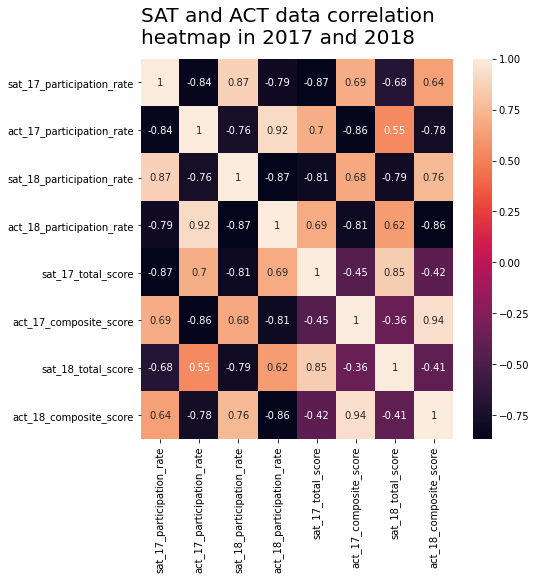

In [61]:
#i am using the filtered and rearranged version of the final dataframe as the original dataframe will make it look super messy and some numeric values are not so important

plt.figure(figsize=(7,7))
sns.heatmap(impt_df.corr(),annot=True).set_title("SAT and ACT data correlation \nheatmap in 2017 and 2018", fontsize =20,loc='left',pad=15);

It can be seen from the heatmap above that the participation rate between the SAT and ACT have negative correlation. The participation rate and total/composite scores are also inversely correlated.


**Note: I have excluded the subtest values so that the heatmap looks neater** (I have checked with Divya on this) 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [62]:
def subplot_histograms(dataframe, list_of_columns,list_of_titles,xlabels):
    '''this function takes in dataframe, list of columns, list of titles and x-labels to create a histogram'''
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(10,10)) # You'll want to specify your figsize
    fig.tight_layout(pad=5.0)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=10) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # setting the title names
        ax[i].set_xlabel(xlabels, fontsize = 12) #setting the x labels
        ax[i].set_ylabel("Number of States", fontsize=12)
        ax[i].axvline(np.mean(dataframe[column]), color='red', linestyle='--', lw=1); #set the mean line

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

**Participation rates for SAT & ACT**

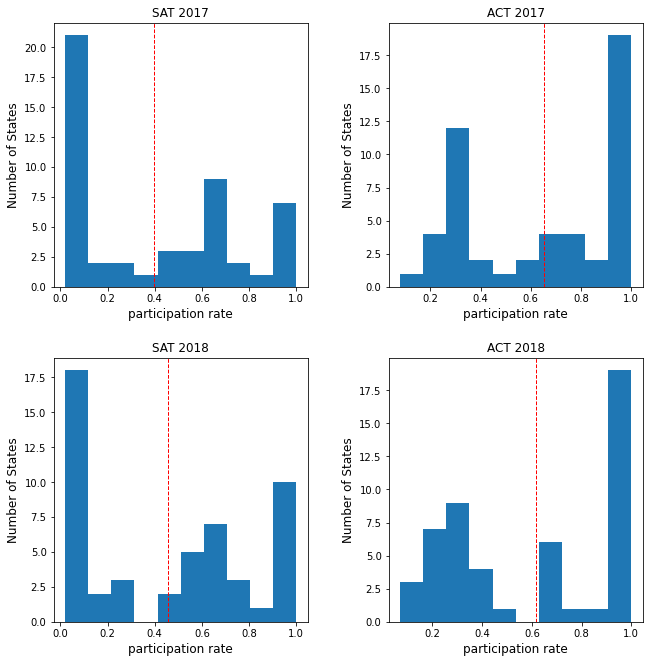

In [63]:
# defining the arguments
list_of_columns = ['sat_17_participation_rate','act_17_participation_rate','sat_18_participation_rate','act_18_participation_rate']
list_of_titles = ["SAT 2017","ACT 2017","SAT 2018","ACT 2018"]
xlabels= "participation rate"

#invoking the function
subplot_histograms(final, list_of_columns,list_of_titles,xlabels)




The histogram is able to tell us the distribution of the participation rate even without the kde line. We can see from the histogram that the graph is not normally distributed. The mean is not at the center of the plot and the mode is definitely not the same value as the mean.

**Math scores for SAT & ACT**

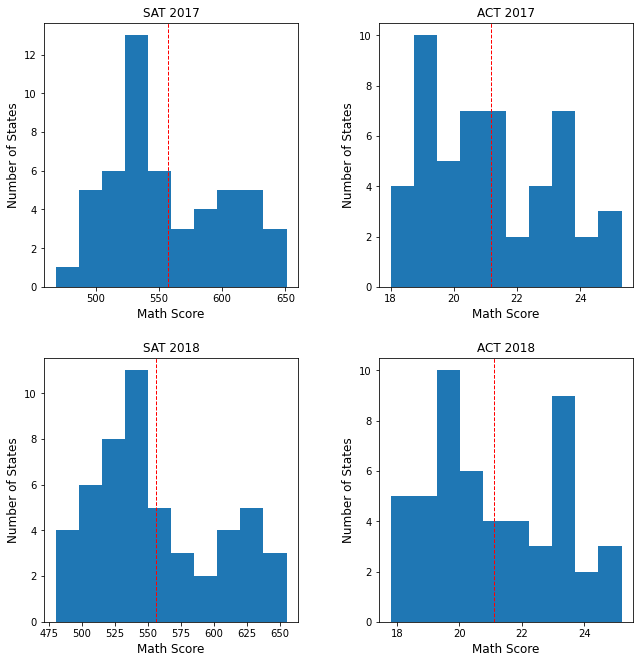

In [64]:
#defining the arguments
list_of_columns = ['sat_17_math_score','act_17_math_score','sat_18_math_score','act_18_math_score']
list_of_titles = ["SAT 2017","ACT 2017","SAT 2018","ACT 2018"]
xlabels= "Math Score"

#invoking the functions
subplot_histograms(final, list_of_columns,list_of_titles,xlabels)

The subplots show the distribution of the Math scores. All the subplots are not normally distributed.

**Reading/verbal scores for SAT & ACT**

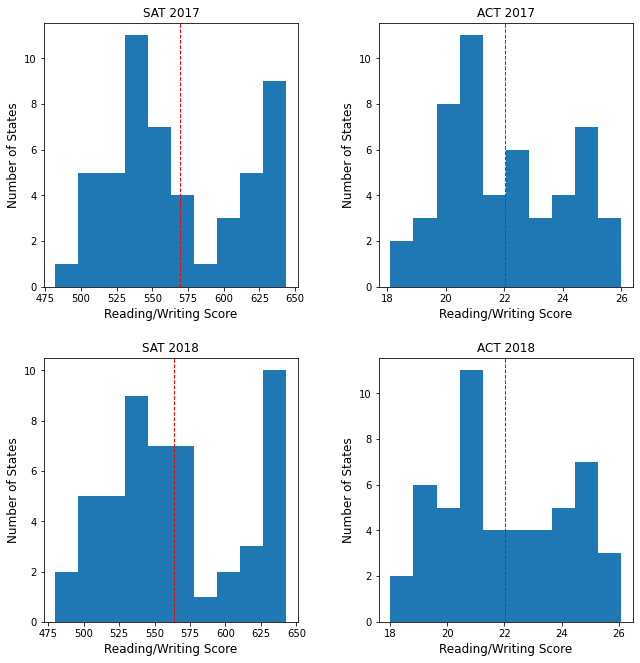

In [65]:
#defining the arguments

list_of_columns = ['sat_17_erw_score','act_17_reading_score','sat_18_erw_score','act_18_reading_score']
list_of_titles = ["SAT 2017","ACT 2017","SAT 2018","ACT 2018"]
xlabels= "Reading/Writing Score"


#invoking the function
subplot_histograms(final, list_of_columns,list_of_titles,xlabels)

The subplots show the distribution of Reading/Writing scores of SAT and ACT. All the subplots are not normally distributed.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


**SAT vs. ACT math scores for 2017**

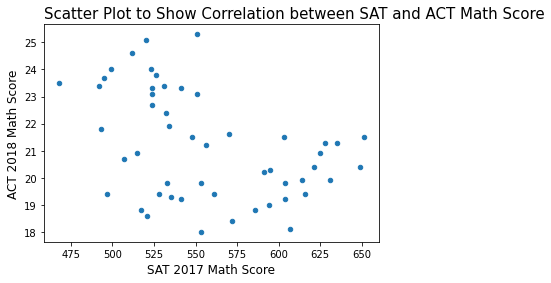

In [66]:
#plotting the scatter plot to show correlation between ACT and SAT Math score
math_scatter_plot = final.plot(kind='scatter',x='sat_17_math_score',y='act_17_math_score');
math_scatter_plot.set_title("Scatter Plot to Show Correlation between SAT and ACT Math Score",fontsize=15,loc='left');
math_scatter_plot.set_xlabel("SAT 2017 Math Score",fontsize=12);
math_scatter_plot.set_ylabel("ACT 2018 Math Score",fontsize=12);

The scatter plot shows weak inverse correlation between SAT and ACT Math scores in 2017

**SAT vs. ACT verbal/reading scores for 2017**

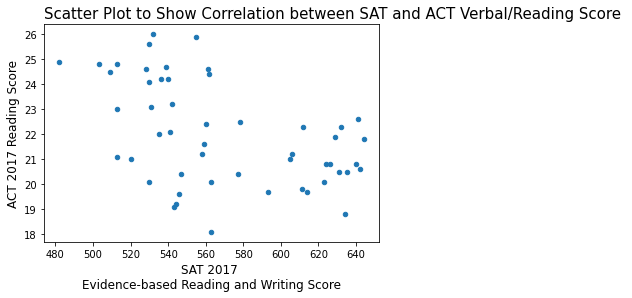

In [67]:
reading_scatter_plot = final.plot(kind='scatter',x='sat_17_erw_score',y='act_17_reading_score');
reading_scatter_plot.set_title("Scatter Plot to Show Correlation between SAT and ACT Verbal/Reading Score ",fontsize=15,loc='left');
reading_scatter_plot.set_xlabel("SAT 2017 \nEvidence-based Reading and Writing Score",fontsize=12);
reading_scatter_plot.set_ylabel("ACT 2017 Reading Score",fontsize=12);

The scatter plot shows weak inverse correlation between SAT and ACT Verbal and Reading scores in 2017

**SAT vs. ACT total/composite scores for 2017**

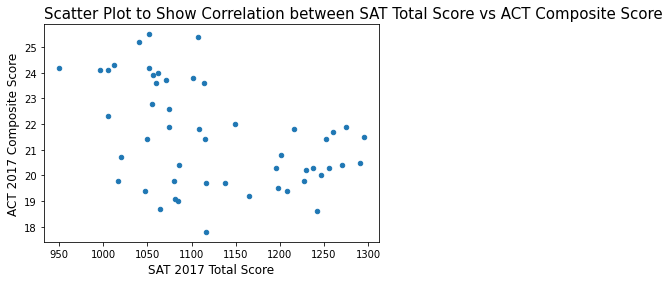

In [68]:
composite_scatter_plot = final.plot(kind='scatter',x='sat_17_total_score',y='act_17_composite_score');
composite_scatter_plot.set_title("Scatter Plot to Show Correlation between SAT Total Score vs ACT Composite Score",fontsize=15,loc='left');
composite_scatter_plot.set_xlabel("SAT 2017 Total Score",fontsize=12);
composite_scatter_plot.set_ylabel("ACT 2017 Composite Score",fontsize=12);

The scatter plot shows weak inverse correlation between SAT and ACT Total/Composite scores in 2017

**Total scores for SAT 2017 vs. 2018**

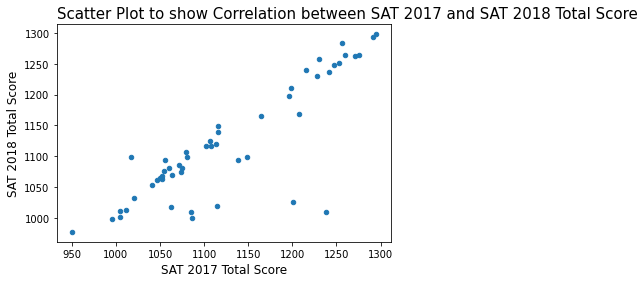

In [69]:
total_sat_plot = final.plot(kind='scatter',x='sat_17_total_score',y='sat_18_total_score');
total_sat_plot.set_title("Scatter Plot to show Correlation between SAT 2017 and SAT 2018 Total Score",fontsize=15, loc='left');
total_sat_plot.set_xlabel("SAT 2017 Total Score",fontsize=12);
total_sat_plot.set_ylabel("SAT 2018 Total Score",fontsize=12);

The scatter plot shows positive correlation between SAT 2017 and SAT 2018 total score

**Composite scores for ACT 2017 vs. 2018**

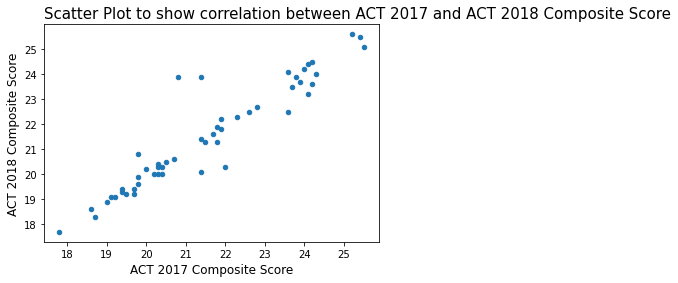

In [70]:
composite_act_plot= final.plot(kind='scatter',x='act_17_composite_score',y='act_18_composite_score');
composite_act_plot.set_title("Scatter Plot to show correlation between ACT 2017 and ACT 2018 Composite Score",fontsize=15,loc='left');
composite_act_plot.set_xlabel("ACT 2017 Composite Score",fontsize=12);
composite_act_plot.set_ylabel("ACT 2018 Composite Score",fontsize=12);

The scatter plot shows positive correlation between ACT 2017 and ACT 2018 Composite score

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

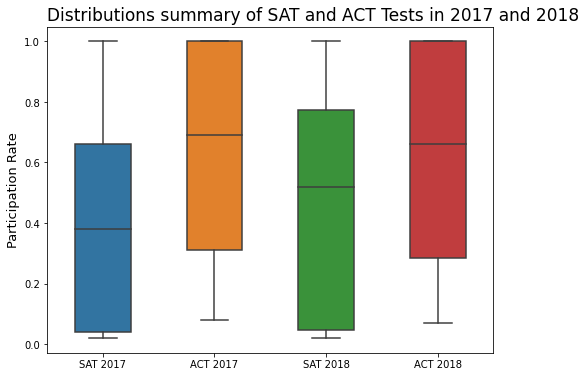

In [71]:
#accessing just the participation rate columns 
participation_rate = final.loc[: , ["sat_17_participation_rate","act_17_participation_rate","sat_18_participation_rate","act_18_participation_rate"]]

plt.figure(figsize=(8,6)) #setting the figure size
participation_plot = sns.boxplot(data=participation_rate,width=0.5);#plotting the boxplot

#setting the labels and title
participation_plot.set_title("Distributions summary of SAT and ACT Tests in 2017 and 2018", fontsize=17,loc='left');
participation_plot.set_xticklabels(["SAT 2017","ACT 2017","SAT 2018","ACT 2018"]);
participation_plot.set_ylabel("Participation Rate",fontsize= 13);


As mentioned earlier, the participation rate of SAT is much lower than ACT. 

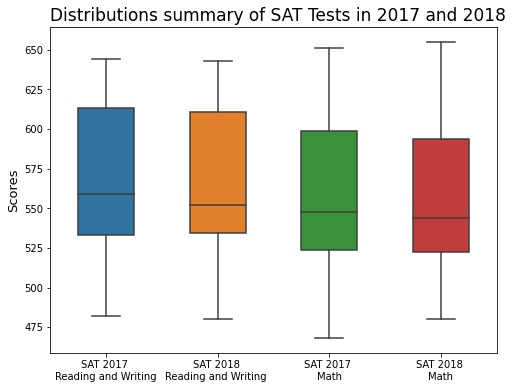

In [72]:
#filtering the math and evidence based reading and writing column of SAT
sat_subtest_scores = final.loc[:,["sat_17_erw_score","sat_18_erw_score","sat_17_math_score","sat_18_math_score"]]


plt.figure(figsize=(8,6)) #setting the figure size
sat_subtests_plot = sns.boxplot(data=sat_subtest_scores,width=0.5); #plotting the boxplot

#setting the title and labels
sat_subtests_plot.set_title("Distributions summary of SAT Tests in 2017 and 2018", fontsize=17,loc='left');
sat_subtests_plot.set_xticklabels(["SAT 2017 \nReading and Writing","SAT 2018 \nReading and Writing ",
                                   "SAT 2017 \nMath","SAT 2018 \nMath"]);
sat_subtests_plot.set_ylabel("Scores",fontsize= 13);

The scores are quite consistent in 2017 and 2018. However, there is a slight increase in the average Math scores from 2017 SAT Math results to 2018 SAT Math results

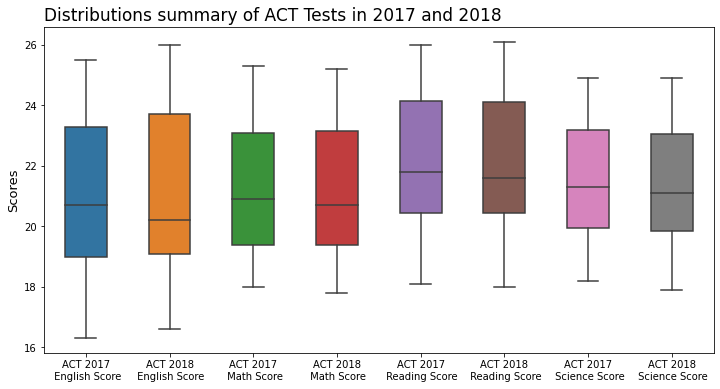

In [73]:
#accessing the desired columns
act_subtest_scores = final.loc[:,["act_17_english_score","act_18_english_score","act_17_math_score","act_18_math_score",
                            "act_17_reading_score","act_18_reading_score","act_17_science_score","act_18_science_score"]]

#setting the figuresize
plt.figure(figsize=(12,6))
act_subtests_plot = sns.boxplot(data=act_subtest_scores,width=0.5); #plotting the boxplot


#setting the title and labels
act_subtests_plot.set_title("Distributions summary of ACT Tests in 2017 and 2018", fontsize=17,loc='left');
act_subtests_plot.set_xticklabels(["ACT 2017\n English Score", "ACT 2018\n English Score","ACT 2017\n Math Score","ACT 2018\n Math Score",
                                   "ACT 2017\n Reading Score","ACT 2018\n Reading Score","ACT 2017\n Science Score","ACT 2018\n Science Score"]);
act_subtests_plot.set_ylabel("Scores",fontsize= 13);

The boxplot is rearranged in a way such that it is easier to compare the results of different years within the same subtest.

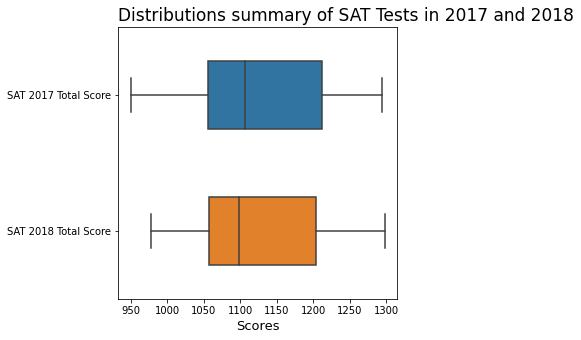

In [74]:
#accessing the desired columns
sat_total_scores = final.loc[:,["sat_17_total_score","sat_18_total_score"]]

#setting the figure size
plt.figure(figsize=(5,5))
sat_total_plot = sns.boxplot(data=sat_total_scores,width=0.5,orient='h'); #plotting the boxplot

#setting the title and labels
sat_total_plot.set_title("Distributions summary of SAT Tests in 2017 and 2018", fontsize=17,loc='left');
sat_total_plot.set_yticklabels(["SAT 2017 Total Score","SAT 2018 Total Score"]);
sat_total_plot.set_xlabel("Scores",fontsize= 13);

The minimum value of SAT total went up by about 2% 

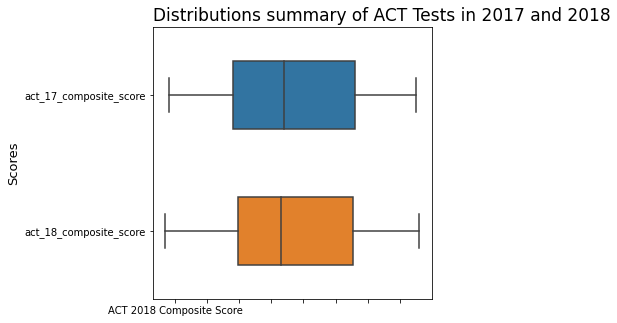

In [75]:
#accessing the desired columns
act_composite_scores = final.loc[:,["act_17_composite_score","act_18_composite_score"]]

plt.figure(figsize=(5,5)) #setting the figuresize
act_composite_plot = sns.boxplot(data=act_composite_scores,width=0.5,orient='h'); #plotting the desired values

#setting the title and labels
act_composite_plot.set_title("Distributions summary of ACT Tests in 2017 and 2018", fontsize=17,loc='left');
act_composite_plot.set_xticklabels(["ACT 2017 Composite Score","ACT 2018 Composite Score"]);
act_composite_plot.set_ylabel("Scores",fontsize= 13);

The composite score of ACT in 2018 did not change much from 2017

In [76]:
#summary statistics to do comparison with the boxplot
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation_rate,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_17_erw_score,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_17_math_score,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_17_total_score,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_17_participation_rate,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_17_english_score,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_17_math_score,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_17_reading_score,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_17_science_score,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_17_composite_score,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**The Distribution Plot of SAT Total Score and ACT Composite Score**

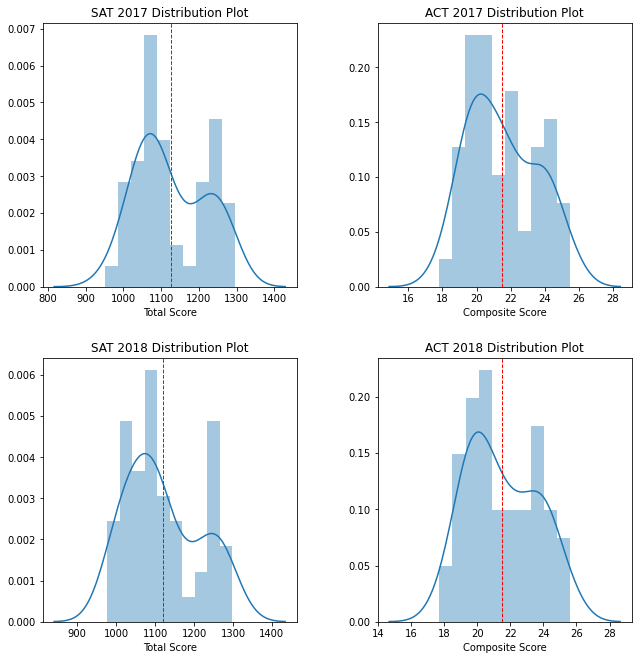

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10)) # You'll want to specify your figsize
fig.tight_layout(pad=5.0)

sat_17_total_score = sns.distplot(final['sat_17_total_score'],bins=10,axlabel= "Total Score",ax = ax[0,0])
sat_17_total_score.set_title("SAT 2017 Distribution Plot");
sat_17_total_score.axvline(np.mean(final['sat_17_total_score']), color='red', linestyle='--', lw=1);

act_17_composite_score= sns.distplot(final['act_17_composite_score'],bins=10,axlabel= "Composite Score",ax = ax[0,1])
act_17_composite_score.set_title("ACT 2017 Distribution Plot");
act_17_composite_score.axvline(np.mean(final['act_17_composite_score']), color='red', linestyle='--', lw=1);

sat_18_total_score= sns.distplot(final['sat_18_total_score'],bins=10,axlabel= "Total Score",ax = ax[1,0]);
sat_18_total_score.set_title("SAT 2018 Distribution Plot");
sat_18_total_score.axvline(np.mean(final['sat_18_total_score']), color='red', linestyle='--', lw=1);

act_18_composite_score= sns.distplot(final['act_18_composite_score'],bins=10,axlabel= "Composite Score",ax = ax[1,1]);
act_18_composite_score.set_title("ACT 2018 Distribution Plot");
act_18_composite_score.axvline(np.mean(final['act_18_composite_score']), color='red', linestyle='--', lw=1);


Since we were not asked to draw the histogram of the total scores and composite scores earlier, I am plotting the distributions curve just for reference to show that the total scores and composite scores are not normally distributed too. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

|Feature|Year|Type|Description|
|---|---|---|---| 
|Participation Rate|2017|SAT|It is a right-skewed distribution. The value ranges from 2% to 100%. The standard deviation is 35.3%. The mode, mean (39.8%) and median (38%) value are also different|
|Participation Rate|2018|SAT|It is a left-skewed distribution. The value ranges  from 2% to 100%. The standard deviation is 37.3%.The mode,mean (45.7%) and median (52%) are different |
|Participation Rate|2017|ACT|It is a left-skewed distribution. The value ranges  from 8% to 100%. The standard deviation is 32.1%. The mode,mean (65%) and median (69%)are different|
|Participation Rate|2018|ACT|It is a left-skewed distribution. The value ranges  from 7% to 100%. The standard deviation is 34.1%. The mode,mean (61.6%) and median (66%) are different|
|Math Score|2017|SAT|It is a right-skewed distribution. The value ranges  from 468 to 651. The standard deviation is 47.1. The mode,mean (557) and median (548) are different|
|Math Score|2018|SAT|It is a right-skewed distribution. The value ranges  from 480 to 655. The standard deviation is 47.8. The mode,mean (556) and median (544) are different|
|Evidence-based Reading and Writing Score|2017|SAT|It is a right-skewed distribution. The value ranges  from 482 to 644.The standard deviation is 45.7. The mode,mean (569) and median (559)are different|
|Evidence-based Reading and Writing Score|2018|SAT|It is a right-skewed distribution. The value ranges  from 480 to 643. The standard deviation is 47.5 .The mode,mean (564) and median (552) are different|
|Total score|2017|SAT|It is a right-skewed distribution. The value ranges  from 950 to 1295. The standard deviation is 92.5.  The mode,mean (1126) and median (1107)are different|
|Total score|2018|SAT|It is a right-skewed distribution. The value ranges  from 977 to 1298. The standard deviation is 94.2.The mode,mean (1120) and median (1059) are different|
|English Score|2017|ACT|It is a right-skewed distribution. The value ranges  from 16.3 to 25.5. The standard deviation is 2.4 .The mode,mean (20.9) and median (20.7) are different|
|English Score|2018|ACT|It is a right-skewed distribution. The value ranges  from 16.6 to 26. The standard deviation is 2.4. The mode,mean (21.0)and median (20.2) are different|
|Math Score|2017|ACT|It is a right-skewed distribution. The value ranges  from 18.0 to 25.3. The standard deviation is 2.0 .The mode,mean(21.2)and median (20.9) are different|
|Math Score|2018|ACT|It is a right-skewed distribution. The value ranges  from 17.8 to 25.2. The standard deviation is 2.0. The mode,mean (21.1) and median (20.7) are different|
|Reading Score|2017|ACT|It is a right-skewed distribution. The value ranges  from 18.1 to 26.0. The standard deviation is 2.1 .The mode,mean(22.0) and median (21.8) are different|
|ReadingScore|2018|ACT|It is a right-skewed distribution. The value ranges  from 18.0 to 26.1.The standard deviation is 2.2.  The mode,mean (22.0) and median (21.6) are different|
|Science Score|2017|ACT|It is a right-skewed distribution. The value ranges  from 18.2 to 24.9. The standard deviation is 1.7. The mode,mean (21.5) and median (21.3) are different|
|Science Score|2018|ACT|It is a right-skewed distribution. The value ranges  from 18.0 to 26.1. The standard deviation is 1.9 .The mode,mean (21.3) and median (21.1) are different|
|Composite Score|2017|ACT|It is a right-skewed distribution. The value ranges  from 17.8 to 25.5. The standard deviation is 2.0 . The mode,mean (21.5) and median (21.4) are different|
|Composite Score|2018|ACT|It is a right-skewed distribution. The value ranges  from 17.7 to 25.6. The standard deviation is 2.1. The mode,mean (21.5) and median (21.3) are different|



#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: 
In general, this trend is not observed. From the total/composite score SAT and ACT distribution plot above, it is evident that the graph is not normally distributed (not symmetrical). It seems like the graph is right skewed, with the mean being higher than the median. This observation is consistent in the box plot graph and the summary statistics table generated. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

From the histogram that was drawn earlier, it seems like the distribution curve for the Math and Reading score follows the total and composite scores for SAT and ACT respectively. It is also a right skewed distribution. 

As for the participation rate distribution, it can also be seen from the histogram that they are both not normally distributed. 

The implication is it will affect the inference that we make on the true population as it may not follow the properties and assumptions that we can make using the Central Limit Theorem. Hence, the inference that we make on the true population will not be accurate.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 
It is evident from the scatter plot that the participation rate of SAT and ACT is negatively correlated. The states with high SAT participation rate has a low ACT participation rate and vice versa. However, it is difficult to make an accurate inference as each sample( which is each state in this context) has a different size. For example, if we take California as a sample vs Wyoming. 

According to the [World Population Review website](https://worldpopulationreview.com/states/), 2018 population size in California is 39,557,045 while the population size in Wyoming is 577,737. Hence, 50% participation rate from California vs 50% participation rate from Wyoming have a huge difference in value. The assumption made here is that public high school graduates are proportional to the total population size at each state. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: 
We can't compare them in this manner as these students took two different tests. We can only make that deduction if the test that is taken by both students are the same. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

I have chosen Colorado, Illinois, Oklahoma to demonstrate interesting trends in the participation rates.

While doing Exploratory data analysis, I have noticed that both Colorado and Illinois had a low SAT participation rate in year 2017. However, the rate increased to 100% and 99% respectively for both states in 2018. I thought this was worth exploring further. 


Hence, after doing some research, I found out that Colorado and Illinois signed a contract with the College Board in 2015 and 2016. It might have taken awhile to implement the switch as these two states used to have ACT as their mandatary state assessment (Source: [Chalkbeat](https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/) and [Chicago Tribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html))

**So why did these two states switch their mandatary statewide assessment from ACT to SAT?**

For Colorado and Illinois, this decision has shocked many as they were the first two states who implemented ACT as a statewide assessment in 2001. It seems that there are several factors that influenced this decision. (Source: [PrepScholar](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice))


The shift in momentum seems to be due to the redesigned SAT Test released in 2016. It was made to align the SAT with Common Core Standards. Common Core Standards is the education standards for American schools that was implemented in 2013-2014. (Source: [PrepScholar](https://blog.prepscholar.com/which-states-require-the-sat))

Illinois State Board of Education (ISBE) officials mentioned that after examining both exams thoroughly, they felt that SAT was better aligned with standards for what students should know in Illinois (Source: [Chicago Tribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) ). 

The reason for the switch in Colorado is not known. However, one reason may be due to SAT having reptuation for being more reason-based and focused on critical thinking while ACT is more of a fact-recall test.(Source: [Chalkbeat](https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)) 


The other interesting state is Oklahoma. Even though the state does not require student to take either exam, it seems like ACT is a lot more popular in Oklahoma as compared to SAT. It has 100% ACT participation rate in both 2017 and 2018 while it only has 7% and 8% SAT participation rate in 2017 and 2018. According to The Oklahoman website, some people believe that Oklahomas colleges require ACT while SAT is more commonly required by schools on the East Coast. 
(Source: [The Oklahoman](https://oklahoman.com/article/5568167/most-oklahoma-schools-choose-act-a-few-go-with-sat)). It is indeed true that the SAT seems to be more popular among the East coast states. 



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

From my research, it shows that there are more states in the US that require their high school students to take ACT as compared to the number of states that has made SAT mandatory. 

ACT has been made a statewide assessment since 2001 by Colorado and Illinois. Since then, many states followed suit. This has caused ACT to overtake SAT as the most popular statewide examination taken by high school students. The College Board only introduced a similar program in 2010. However, it only started to gain back its popularity in 2016 after it redesigned its exam format to be in accordance with the Common Core Standards.(Source: [PrepScholar](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice))

Based on the participation rate provided from the data given, the participation rate of ACT by states is higher than the participation rate of SAT by states (ACT 2018 participation mean: 61.6% vs SAT 2018 participation mean: 45.7%). However, as mentioned earlier, this is not an accurate representation of the total population (the number of people who actually took the test) as there is a huge population size difference in each state. According to [US.News](https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take), there were 2.1 million test-takers who completed SAT and 1.9 million students took the ACT. Even though there might be some overlap as some students might have taken both. 

As part of the College Board, I would definitely like to increase the participation rate of SAT further. It seems that there are a few reasons that would make SAT more attractive than ACT.
1. The learning experience that SAT offers - students have access to materials on Khan Academy which includes video lessons and personalized resources based on their test results. For students who have been taking PSAT since the 8th or 9th grade, the personalized resources will prepare them early for the SAT examination which will be submitted for college entry. 
2. It connects students to scholarship opportunities as The National Merit Scholarship program uses PSAT/NMSQT (The test offered by College Board) to identify candidates 
3. The College Board also offers Advanced Placement (AP) Program which will expose high school students to college-level courses and at the same time, they can earn college credits. As AP is offered by the College Board, the SAT suite of assessment will be able to help schools to identify students with potential to succeed in certain AP Courses and Exams. 
4. College Application Fee waivers for income-eligible SAT takers
(Source: [College Board](https://collegereadiness.collegeboard.org/about/benefits))


I would like to choose Oklahama as an example. It has a low SAT participation rate of 8% in 2018 and 100% ACT Participation rate in 2018. The Oklahama state requires the school to offer a single college-or-career-readiness exam but it is up to the schools to decide on which exam to choose. This means that The Oklahoma State Department of Education provides funding for every public school junior to take either the ACT or SAT for free. Even though most high schools in Oklahoma has chosen ACT over SAT, Oklahoma's two biggest schools have chosen to offer SAT instead. There are a total of 10 districts that have selected SAT over ACT. 

With these factors in mind, it seems that the high schools will be the deciding factor on the participation rate in this state. As the redesigning of SAT exams and benefits are relatively new, I think that the College Board needs to raise awareness by the following methods:

1. Approach high schools directly to have a discussion on getting them onboard in making SAT Test mandatory for their schools

2. Assuring parents, students and high schools that ACT scores are not preferred over SAT scores in Oklahama colleges admission

3. The college board can also conduct free workshops in schools to demonstrate the learning experience that each student can get if they are to participate in SAT exams while raising awareness on the other benefits such as advance placement programme that will give them an advantage during college applications, scholarship programmes as well as college application fee-waiver for eligible students

4. Running social media campaign (Facebook and Instagram) targeting the right age group in Oklahama which will allow the students to get sample materials or sample personalized assessment.

5. Lastly, I think the college board should also approach the local State Board of Education to pitch the benefits of the newly revamped SAT programmes.

We will continue to review this strategy and if it turns out to be successful, we will be able to apply this strategy to the other states that have yet to impose ACT as the mandatory statewide examination.